## NLP for Supervised Learning

### Read in cappuccino cup review data

data can be found : https://drive.google.com/file/d/1ON6-5EcCWxK1JjxDuJCh7YsK9Rw6Y0ZY/view?usp=sharing

In [2]:
import nltk #there is a library that makes nltk easier to use
import pandas as pd
import re
import string

In [3]:
cd ..

c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis


In [6]:
ls data

 Volume in drive C has no label.
 Volume Serial Number is 0E84-94DB

 Directory of c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\data

12/23/2021  09:07 AM    <DIR>          .
12/23/2021  09:07 AM    <DIR>          ..
01/25/2021  03:29 AM     8,171,787,229 steam_reviews.csv
12/22/2021  12:43 AM     3,624,010,030 steam_reviews-ENGLISH.csv
12/23/2021  09:07 AM        32,721,370 steam_reviews-ENGLISH-sample.csv
               3 File(s) 11,828,518,629 bytes
               2 Dir(s)  92,795,809,792 bytes free


In [10]:
data = pd.read_csv('data/steam_reviews-ENGLISH-sample.csv')
data

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
2,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,...,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
4,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,...,True,False,False,76561198996835044,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,292030,The Witcher 3: Wild Hunt,37737848,english,pretty good game,1511746432,1511746432,True,0,0,...,False,False,False,76561198248862428,214,24,4263.0,0.0,1180.0,1.580618e+09
99996,292030,The Witcher 3: Wild Hunt,37737492,english,"The greatest game ever made, if you haven't pl...",1511746089,1511746089,True,1,0,...,True,False,False,76561198155221866,145,8,9971.0,0.0,9584.0,1.493935e+09
99997,292030,The Witcher 3: Wild Hunt,37737280,english,Amazing graphics and storyline!,1511745873,1511745873,True,0,0,...,True,False,False,76561198057394660,97,2,724.0,0.0,87.0,1.585956e+09
99998,292030,The Witcher 3: Wild Hunt,37737060,english,My only regret is that I will never experience...,1511745624,1516111635,True,0,0,...,True,False,False,76561198061575266,133,5,9313.0,0.0,8330.0,1.570408e+09


In [4]:
data

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
2,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,...,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
4,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,...,True,False,False,76561198996835044,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9635432,546560,Half-Life: Alyx,65645167,english,best game ever\n,1584986750,1584986750,True,0,0,...,True,False,False,76561198817267089,86,8,1055.0,14.0,45.0,1.611138e+09
9635433,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
9635434,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
9635435,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09


In [11]:
data= data[["recommended","review"]]

### Exploratory data analysis

In [12]:
# There are 542 reviews in the dataset
len(data)

100000

In [13]:
data.shape

(100000, 2)

In [15]:
data = data.rename(columns={'review': 'reviews'})

In [16]:
# While most reviewers leave a 5 star review, there are also a good portion leaving 1 star reviews
data.recommended.value_counts(normalize=True)

True     0.97748
False    0.02252
Name: recommended, dtype: float64

In [17]:
import numpy as np

# Remove 3 star reviews
# data = data[data.stars!=3]

# Set 4/5 star reviews to positive, the rest to negative
data['sentiment'] = np.where(data['recommended'] , 'positive', 'negative')

# Include only the sentiment and reviews columns
data = data[['sentiment', 'reviews']]
data.head()

,sentiment,reviews
0,positive,"One of the best RPG's of all time, worthy of a..."
1,positive,"good story, good graphics. lots to do."
2,positive,"dis gud,"
3,positive,favorite game of all time cant wait for the Ne...
4,positive,Why wouldn't you get this


In [18]:
data.sentiment.value_counts()

positive    97748
negative     2252
Name: sentiment, dtype: int64

In [19]:
# Check the length of the new dataset
len(data)

100000

In [11]:
# Note that the dataset has mostly positive reviews
data.sentiment.value_counts(normalize=True)

positive    0.890924
negative    0.109076
Name: sentiment, dtype: float64

### Preprocess the text

In [12]:
data['reviews'] = data['review'].astype("string")

In [21]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

In [23]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', str(x))
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['reviews'] = data.reviews.map(alphanumeric).map(punc_lower)
data.head()

,sentiment,reviews
0,positive,one of the best rpg s of all time worthy of a...
1,positive,good story good graphics lots to do
2,positive,dis gud
3,positive,favorite game of all time cant wait for the ne...
4,positive,why wouldn t you get this


In [24]:
for x in data['reviews']:
    x= re.sub('\w*\d\w*', ' ', str(x))
    re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [25]:
data = data.rename(columns={'review': 'reviews'})

In [26]:
data

,sentiment,reviews
0,positive,one of the best rpg s of all time worthy of a...
1,positive,good story good graphics lots to do
2,positive,dis gud
3,positive,favorite game of all time cant wait for the ne...
4,positive,why wouldn t you get this
...,...,...
99995,positive,pretty good game
99996,positive,the greatest game ever made if you haven t pl...
99997,positive,amazing graphics and storyline
99998,positive,my only regret is that i will never experience...


### Prepare data for modeling

In [18]:
# Split the data into X and y data sets
X = data.reviews 
y = data.sentiment

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=7)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv1= CountVectorizer(stop_words="english")
X_train_cv1= cv1.fit_transform(X_train)
X_test_cv1= cv1.transform(X_test)

In [ ]:
df_cv1= pd.DataFrame(X_train_cv1.toarray(), columns= cv1.get_feature_names())

In [29]:
cv2= CountVectorizer(ngram_range=(1,2),binary=True, stop_words="english")
X_train_cv2= cv2.fit_transform(X_train)
X_test_cv2= cv2.transform(X_test)


In [ ]:
df_cv2= pd.DataFrame(X_train_cv2.toarray(), columns= cv2.get_feature_names())

### Try classifying using Logistic Regression

In [23]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [25]:
lr.fit(X_train_cv1,y_train)
y_pred_cv1= lr.predict(X_test_cv1)

# lr.fit(X_train_cv2,y_train)
# y_pred_cv2= lr.predict(X_test_cv2)

c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# Train the second model
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [27]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

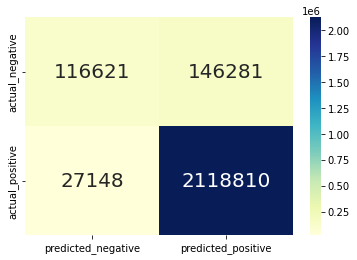

In [28]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

In [29]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(cm1))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1']
results

,LogReg1
Accuracy,0.928
Precision,0.935
Recall,0.987
F1 Score,0.960


In [43]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1', 'LogReg2']
results

,LogReg1,LogReg2
Accuracy,0.983,0.983
Precision,0.986,0.985
Recall,0.997,0.998
F1 Score,0.991,0.991


Comparing the two models, the first model has better precision, while the second model has better accuracy and recall.

### Try classifying using Naive Bayes

In [30]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [ ]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv2)

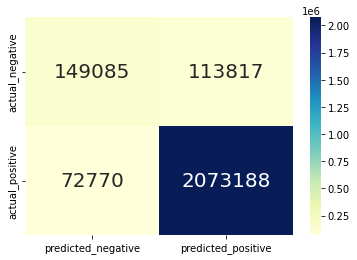

In [32]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_cv1_nb)

In [ ]:
# Here's the heat map for the second Naive Bayes model
cm4 = conf_matrix(y_test, y_pred_cv2_nb)

In [34]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(cm3))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB1']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LogReg1,NB1
Accuracy,0.928,0.923
Precision,0.935,0.948
Recall,0.987,0.966
F1 Score,0.960,0.957


The first Naive Bayes model outperforms both Logistic Regression models.

### Try using TF-IDF instead of Count Vectorizer

In [35]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


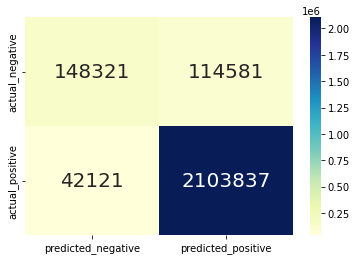

In [36]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm5 = conf_matrix(y_test, y_pred_tfidf1_lr)

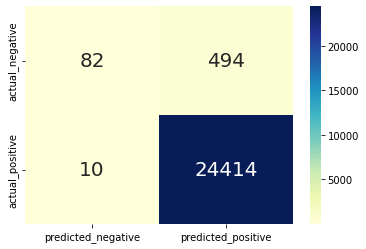

In [51]:
# Fit the second logistic regression on the TF-IDF data
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)
cm6 = conf_matrix(y_test, y_pred_tfidf2_lr)

In [37]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
cm7 = conf_matrix(y_test, y_pred_tfidf1_nb)

MemoryError: Unable to allocate 46.6 TiB for an array with shape (7226577, 886373) and data type float64

In [55]:
# Fit the second Naive Bayes model on the TF-IDF data
bnb.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf2_nb = bnb.predict(X_test_tfidf2)
cm8 = conf_matrix(y_test, y_pred_tfidf2_nb)

MemoryError: Unable to allocate 261. GiB for an array with shape (75000, 466728) and data type float64

In [56]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm5, cm6, cm7, cm8)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR1-TFIDF', 'LR2-TFIDF', 'NB1-TFIDF', 'NB2-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

NameError: name 'cm7' is not defined

It looks like using TF-IDF, we were able to improve the recall, but the accuracy and precision of the first Naive Bayes model still outperforms the other models.

Overall, the first Naive Bayes model (using unigrams and counts) seems to best classify positive and negative cappuccino cup reviews.

In [114]:
corpus= data.reviews

In [117]:
cv_c= CountVectorizer()
features_trained= cv_c.fit_transform(corpus)
df_c= pd.DataFrame(features_trained.toarray(), columns=cv_c.get_feature_names())

c:\Users\user\T5\PRACTICE\NBM_Unsupervised_Gamma\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [118]:
df_c

,aaa,abandoning,abilities,ability,able,about,absoloutly,absolute,absolutely,absorb,...,youtube,yuo,yup,zoltan,zoomed,попа,пудж,很好玩,没话讲,波兰蠢驴nb
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
from numpy import dot
from numpy.linalg import norm
cosine = lambda v1, v2: dot(v1, v2) / (norm(v1) * norm(v2))
cosine([1, 1, 1, 0], [1, 1, 0, 1])

0.6666666666666667

In [28]:
reviews= data["reviews"].copy(deep=True)

In [ ]:
del x, data

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
vectorizer= CountVectorizer(stop_words="english")

In [33]:
doc_word= vectorizer.fit_transform(reviews)

In [38]:
doc_word.toarray()

MemoryError: Unable to allocate 32.9 GiB for an array with shape (100000, 44187) and data type int64

In [37]:
(vectorizer.get_feature_names())

['aa',
 'aaa',
 'aaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaa',
 'aaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

In [40]:
pd.DataFrame(doc_word.toarray(), columns=vectorizer.get_feature_names()).head()

MemoryError: Unable to allocate 32.9 GiB for an array with shape (100000, 44187) and data type int64

In [41]:
lsa= TruncatedSVD(2)
doc_topic= lsa.fit_transform(doc_word)

In [42]:
lsa.explained_variance_ratio_

array([0.20124303, 0.0251019 ])

In [43]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2"],
             columns = vectorizer.get_feature_names())
topic_word

c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaa,aaaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaaaaaa,aaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaa,...,𝖔𝖓,𝖗𝖊𝖈𝖔𝖒𝖒𝖊𝖓𝖉,𝖙𝖍𝖎𝖘,𝖜𝖔𝖓,𝘌𝘷𝘦𝘳𝘺𝘵𝘩𝘪𝘯𝘨,𝘢𝘣𝘴𝘰𝘭𝘶𝘵𝘦𝘭𝘺,𝘨𝘢𝘮𝘦,𝘵𝘩𝘪𝘴,𝙝𝙤𝙡𝙮,𝙨𝙝𝙚𝙩
component_1,0.0,0.004,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
component_2,0.0,0.001,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [45]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [46]:
display_topics(lsa, vectorizer.get_feature_names(), 5)


Topic  0
game, story, witcher, like, just

Topic  1
witcher, story, like, just, world


c:\Users\user\T5\PROJECT\game-reviews-sentiment-analysis\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = reviews,
             columns = ["component_1","component_2" ])
Vt

,component_1,component_2
reviews,,
one of the best rpg s of all time worthy of any collection,0.26409,0.02348
good story good graphics lots to do,0.48074,0.59500
dis gud,0.00050,-0.00173
favorite game of all time cant wait for the nexgen versiion,0.91225,-0.45499
why wouldn t you get this,0.00456,0.00419
...,...,...
pretty good game,0.92288,-0.37513
the greatest game ever made if you haven t played it you re missing out big time,1.02834,-0.47652
amazing graphics and storyline,0.11172,0.03430


In [48]:
cosine_similarity((doc_topic[0], doc_topic[1])).round()

array([[1., 1.],
       [1., 1.]])

In [49]:
cosine_similarity((doc_topic[0], doc_topic[6])).round()

array([[1., 1.],
       [1., 1.]])